In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generate lists of 1500 cooordinates 

lats_se = []
lngs_se = []

# Need to round to ouput to 4 decimals and append to list
for x in range (0,1500) :
    
    lats = round(np.random.uniform(low=-90.000, high=90.000),4)
    
    lats_se.append(lats)
    lngs = round(np.random.uniform(low=-180.000, high=180.000),4)
    
    lngs_se.append(lngs)
    
#combine cordinates
lat_lngs = zip(lats_se, lngs_se)
#list(lat_lngs)

In [3]:
#Generate List of Cities
cities = []
country_codes = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    country_code = city.country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city_name)
        country_codes.append(country_code)


#print(cities)
#print(country_codes)

In [4]:
#Combined loops for query

city_count = 0
city_count2 = 0
x = 1

## Create lists to hold each value

city = []
city_id = []
clouds = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind = []


for city_x in cities:
        
    #define URL 
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city_x + "&units=imperial&APPID="+api_key
        
    #Check if data on 500 cities has been gathered
    if city_count == 500:
        break
        
    #check if set of fity cities is complete
    if city_count2 == 50:
        city_count2 = 0
        x = x + 1
                   
    try:
        #Check Request status code
        requests.get(url).raise_for_status()
            
        #if no error found
        response = requests.get(url).json()
           
        #Add one to city count
        city_count = city_count + 1
            
        #Count the number of cities in the set
        city_count2 = city_count2 + 1
            
        # print message
        print("Processing Record " + str(city_count2) + " of Set " + str(x) + "|" + city_x)
            
        #polulate lists
        city.append(response['name'])
        city_id.append(response['id'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
            
    #if error found    
    except requests.exceptions.HTTPError:
        print("City Not Found - Skipping ...." + city_x)
    
    #Delay query 1 second
    time.sleep(1)
    
print(f"Processing Complete")


Processing Record 1 of Set 1|alvaraes
Processing Record 2 of Set 1|rikitea
Processing Record 3 of Set 1|rikitea
Processing Record 4 of Set 1|vaini
Processing Record 5 of Set 1|souillac
Processing Record 6 of Set 1|porto seguro
Processing Record 7 of Set 1|cervo
Processing Record 8 of Set 1|busselton
Processing Record 9 of Set 1|albany
Processing Record 10 of Set 1|bredasdorp
Processing Record 11 of Set 1|esperance
Processing Record 12 of Set 1|sao filipe
Processing Record 13 of Set 1|rikitea
Processing Record 14 of Set 1|busselton
Processing Record 15 of Set 1|roald
Processing Record 16 of Set 1|kapaa
Processing Record 17 of Set 1|hermanus
Processing Record 18 of Set 1|ancud
Processing Record 19 of Set 1|port alfred
City Not Found - Skipping ....taolanaro
Processing Record 20 of Set 1|rikitea
Processing Record 21 of Set 1|vaini
Processing Record 22 of Set 1|khani
Processing Record 23 of Set 1|prescott
Processing Record 24 of Set 1|palmer
Processing Record 25 of Set 1|butaritari
Process

City Not Found - Skipping ....sapao
Processing Record 40 of Set 4|hermanus
Processing Record 41 of Set 4|hilo
Processing Record 42 of Set 4|upernavik
Processing Record 43 of Set 4|wanning
Processing Record 44 of Set 4|muisne
Processing Record 45 of Set 4|zephyrhills
Processing Record 46 of Set 4|mackay
Processing Record 47 of Set 4|haines junction
Processing Record 48 of Set 4|nara
Processing Record 49 of Set 4|codrington
Processing Record 50 of Set 4|albany
City Not Found - Skipping ....toliary
Processing Record 1 of Set 5|hermanus
Processing Record 2 of Set 5|castro
Processing Record 3 of Set 5|punta arenas
Processing Record 4 of Set 5|tiksi
Processing Record 5 of Set 5|qaanaaq
Processing Record 6 of Set 5|jiwani
City Not Found - Skipping ....sentyabrskiy
Processing Record 7 of Set 5|hadrut
Processing Record 8 of Set 5|port alfred
Processing Record 9 of Set 5|rikitea
Processing Record 10 of Set 5|puerto ayora
Processing Record 11 of Set 5|rikitea
Processing Record 12 of Set 5|cabo sa

Processing Record 34 of Set 8|prainha
Processing Record 35 of Set 8|severo-kurilsk
Processing Record 36 of Set 8|hilo
Processing Record 37 of Set 8|kurumkan
Processing Record 38 of Set 8|khvatovka
Processing Record 39 of Set 8|rikitea
Processing Record 40 of Set 8|tasiilaq
Processing Record 41 of Set 8|broome
Processing Record 42 of Set 8|qaanaaq
Processing Record 43 of Set 8|kodiak
Processing Record 44 of Set 8|casambalangan
Processing Record 45 of Set 8|hermanus
Processing Record 46 of Set 8|boromo
Processing Record 47 of Set 8|ushuaia
Processing Record 48 of Set 8|constitucion
Processing Record 49 of Set 8|necochea
Processing Record 50 of Set 8|saint george
Processing Record 1 of Set 9|punta arenas
Processing Record 2 of Set 9|namibe
Processing Record 3 of Set 9|gudari
Processing Record 4 of Set 9|yellowknife
City Not Found - Skipping ....urdzhar
Processing Record 5 of Set 9|xai-xai
Processing Record 6 of Set 9|souillac
Processing Record 7 of Set 9|north bend
Processing Record 8 of 

In [5]:
#Create DataFrame
weather_data = {"City":city,
               "CityID":city_id,
               "Cloudiness":clouds,
               "Country":country,
               "Date":date,
               "Humidity":humidity,
               "Latitude":lat,
               "Longitude":long,
               "MaxTemp":max_temp,
               "WindSpeed":wind}

weather_data_df = pd.DataFrame(weather_data)
weather_data_df


,City,CityID,Cloudiness,Country,Date,Humidity,Latitude,Longitude,MaxTemp,WindSpeed
0,Alvaraes,3665380,44,BR,1545527324,94,-3.22,-64.80,75.20,8.95
1,Rikitea,4030556,68,PF,1545527325,100,-23.12,-134.97,78.53,17.45
2,Rikitea,4030556,68,PF,1545527325,100,-23.12,-134.97,78.53,17.45
3,Vaini,1273574,32,IN,1545523200,87,15.34,74.49,60.80,2.91
4,Souillac,3026644,90,FR,1545525000,100,45.60,-0.60,55.40,3.36
5,Porto Seguro,3452640,0,BR,1545523200,78,-16.44,-39.06,77.00,6.93
6,Cervo,3469169,24,BR,1545527330,90,-22.19,-46.24,68.72,2.68
7,Busselton,2075265,0,AU,1545527331,92,-33.64,115.35,69.62,12.19
8,Albany,5106834,90,US,1545526560,69,42.65,-73.75,35.96,18.34
9,Bredasdorp,1015776,0,ZA,1545523200,88,-34.53,20.04,69.80,2.24


In [6]:
#save data to cvs file
weather_data_df.to_csv(output_data_file)

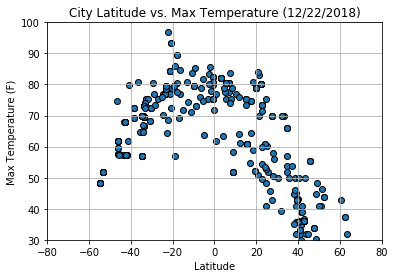

In [7]:
#plot latitude vs Temp

plt.scatter(weather_data_df["Latitude"],weather_data_df["MaxTemp"],marker="o",edgecolors="black")


#Convert Date
time_conv = time.localtime(weather_data_df["Date"][0])
#print(time_conv)
time_conv = time.strftime("%m/%d/%Y")
#print(time_conv)

# set Axis Limits
plt.ylim(30,100)
plt.xlim(-80,80)

#Add labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature " + "("+str(time_conv )+")")

#Add Grid
plt.grid(axis="both")


#save to .png file
plt.savefig("Lat vs Temp Scatter.png", bbox="tight")

plt.show()

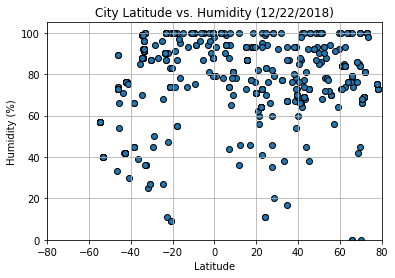

In [8]:
#Plot latitude vs Humidity

plt.scatter(weather_data_df["Latitude"],weather_data_df["Humidity"],marker="o",edgecolors="black")


#Convert Date
time_conv = time.localtime(weather_data_df["Date"][0])
#print(time_conv)
time_conv = time.strftime("%m/%d/%Y")
#print(time_conv)

# set Axis Limits
plt.ylim(0,105)
plt.xlim(-80,80)

#Add labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity " + "("+str(time_conv )+")")

#Add Grid
plt.grid(axis="both")


#save to .png file
plt.savefig("Lat vs Humidity Scatter.png", bbox="tight")

plt.show()

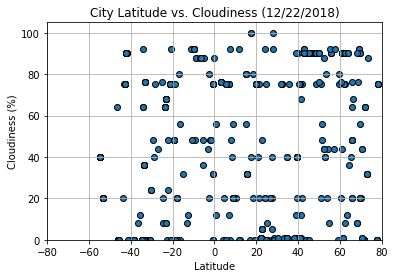

In [9]:
#Plot latitude vs Cloudiness

plt.scatter(weather_data_df["Latitude"],weather_data_df["Cloudiness"],marker="o",edgecolors="black")


#Convert Date
time_conv = time.localtime(weather_data_df["Date"][0])
#print(time_conv)
time_conv = time.strftime("%m/%d/%Y")
#print(time_conv)

# set Axis Limits
plt.ylim(0,105)
plt.xlim(-80,80)

#Add labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness " + "("+str(time_conv )+")")

#Add Grid
plt.grid(axis="both")


#save to .png file
plt.savefig("Lat vs Cloudiness Scatter.png", bbox="tight")

plt.show()

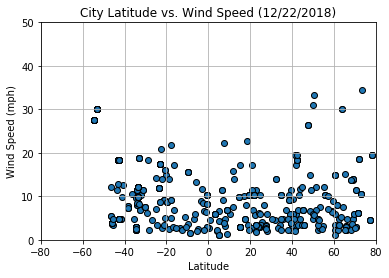

In [10]:
#Plot latitude vs Wind Speed

plt.scatter(weather_data_df["Latitude"],weather_data_df["WindSpeed"],marker="o",edgecolors="black")


#Convert Date
time_conv = time.localtime(weather_data_df["Date"][0])
#print(time_conv)
time_conv = time.strftime("%m/%d/%Y")
#print(time_conv)

# set Axis Limits
plt.ylim(0,50)
plt.xlim(-80,80)

#Add labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed " + "("+str(time_conv )+")")

#Add Grid
plt.grid(axis="both")


#save to .png file
plt.savefig("Lat vs WindSpeed Scatter.png", bbox="tight")

plt.show()

Analysis of  500 randomly selected cites:

1. There is a clear relationship between temperature and distance from the equator. From the scatter plot above, temperatures increase as you reach the equator.  Also cities to north of the equator are experiencing colder tempuratures than cities to the south of the equator, which is the result of the current tilt of the earth's axis.

2. Cloudiness is not a good determining factor in weather condition in relation to distance from the equator. From the plot above it is clear that there is no discernable pattern and therefore cloudiness seems random to a city's location on earth.

3.  Humidity is also not a clear determining factor as there is no observable relationship between humidity and latitude. There are however, more observable data points in the northern hemisphere which suggets that the sample taken may contain more samples from the northern hemisphere, or simply there is was more humidity in the northern hemisphere on the date the sample was taken.

4. Wind speed appear to range from 0 to 20 mps near the center of the globe, with wind speeds increasing as you reach the poles, as shown by some outlier data point in the plot above.
